In [ ]:
!pip install transformers torch datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

MODEL_NAME = "mdhugol/indonesia-bert-sentiment-classification"

# Load tokenizer dan model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv('/content/tokenized.csv')
df.head()


,post
0,asmara gen benak pikir ku waktu drama romansa ...
1,cegah nakal remaja bahaya pornografi kepala un...
2,akibat nakal remaja num klip
3,to marcel woody ww pegang gelar manggala sekol...
4,banjir aqilaa duh merdu nakal remaja pagi banget


In [ ]:
df['text'] = df['post'].astype(str).apply(lambda x: ' '.join(x.split()))  # Sesuaikan kolomnya
df.head()


,post,text
0,asmara gen benak pikir ku waktu drama romansa ...,asmara gen benak pikir ku waktu drama romansa ...
1,cegah nakal remaja bahaya pornografi kepala un...,cegah nakal remaja bahaya pornografi kepala un...
2,akibat nakal remaja num klip,akibat nakal remaja num klip
3,to marcel woody ww pegang gelar manggala sekol...,to marcel woody ww pegang gelar manggala sekol...
4,banjir aqilaa duh merdu nakal remaja pagi banget,banjir aqilaa duh merdu nakal remaja pagi banget


In [ ]:
def predict_sentiment(text):
    # Tokenisasi teks
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Prediksi dengan model
    with torch.no_grad():
        outputs = model(**inputs)

    # Ambil logits dan tentukan label prediksi
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    # Mapping label sentimen
    label_map = {0: "Negatif", 1: "Netral", 2: "Positif"}

    return label_map.get(predicted_class, "Tidak Diketahui")


In [ ]:
df['sentiment'] = df['text'].apply(lambda x: predict_sentiment(x))
df.head()


,post,text,sentiment
0,asmara gen benak pikir ku waktu drama romansa ...,asmara gen benak pikir ku waktu drama romansa ...,Positif
1,cegah nakal remaja bahaya pornografi kepala un...,cegah nakal remaja bahaya pornografi kepala un...,Netral
2,akibat nakal remaja num klip,akibat nakal remaja num klip,Positif
3,to marcel woody ww pegang gelar manggala sekol...,to marcel woody ww pegang gelar manggala sekol...,Netral
4,banjir aqilaa duh merdu nakal remaja pagi banget,banjir aqilaa duh merdu nakal remaja pagi banget,Positif


In [9]:
df.to_csv('/content/labelled/tokenized_with_sentiment.csv', index=False)

In [10]:
import pandas as pd

df = pd.read_csv('/content/labelled/tokenized_with_sentiment.csv')
df.head()


,post,text,sentiment
0,asmara gen benak pikir ku waktu drama romansa ...,asmara gen benak pikir ku waktu drama romansa ...,Positif
1,cegah nakal remaja bahaya pornografi kepala un...,cegah nakal remaja bahaya pornografi kepala un...,Netral
2,akibat nakal remaja num klip,akibat nakal remaja num klip,Positif
3,to marcel woody ww pegang gelar manggala sekol...,to marcel woody ww pegang gelar manggala sekol...,Netral
4,banjir aqilaa duh merdu nakal remaja pagi banget,banjir aqilaa duh merdu nakal remaja pagi banget,Positif


In [11]:
label_map = {"Negatif": 0, "Netral": 1, "Positif": 2}
df['sentiment'] = df['sentiment'].map(label_map)


In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/labelled/tokenized_with_sentiment.csv')

# Hitung jumlah tiap kategori sentimen
sentiment_counts = df["sentiment"].value_counts()

# Menampilkan hasil
print(sentiment_counts)


sentiment
Netral     391
Positif    269
Negatif     38
Name: count, dtype: int64


In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/labelled/tokenized_with_sentiment.csv')

# filter
neutral_df = df[df["sentiment"] == "Netral"]

# Save to CSV file
neutral_df.to_csv('/content/neutral_sentiment.csv', index=False)

print("Neutral sentiment data has been saved to 'neutral_sentiment.csv'.")


Neutral sentiment data has been saved to 'neutral_sentiment.csv'.


Classification Report:
              precision    recall  f1-score   support

     Negatif       0.70      1.00      0.82         7
      Netral       0.70      0.88      0.78         8
     Positif       1.00      0.38      0.55         8

    accuracy                           0.74        23
   macro avg       0.80      0.75      0.72        23
weighted avg       0.80      0.74      0.71        23



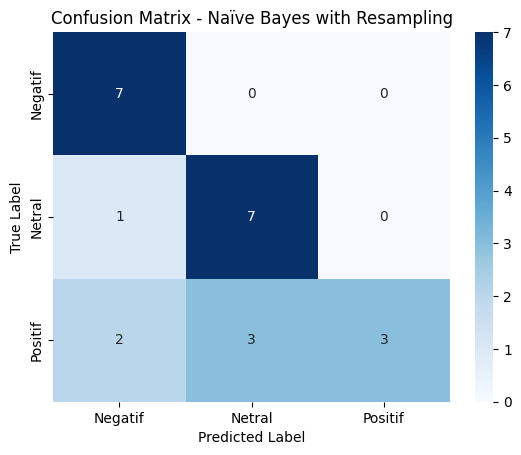

<ipython-input-14-8d2854b6117f>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")
<ipython-input-14-8d2854b6117f>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="viridis")


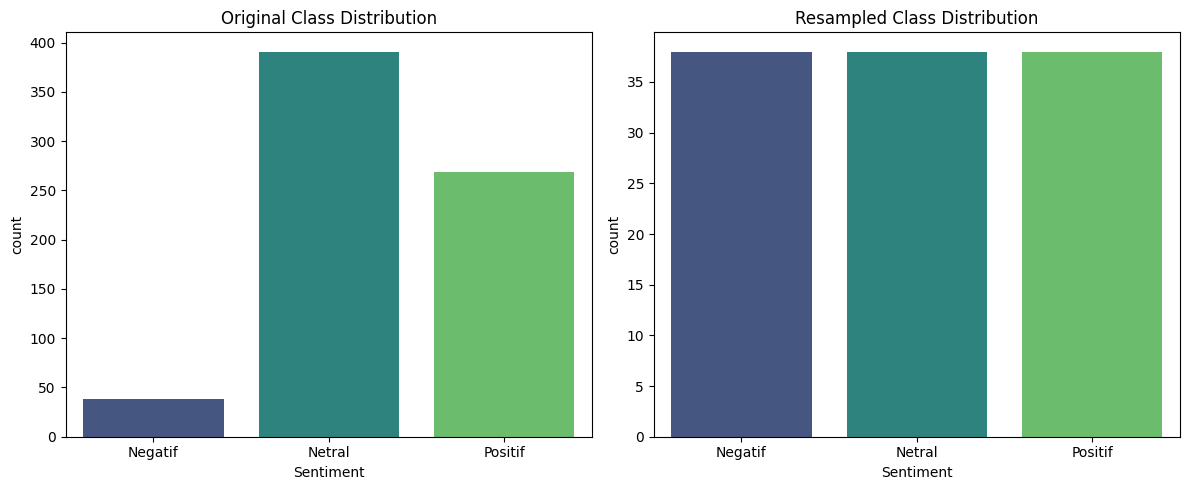

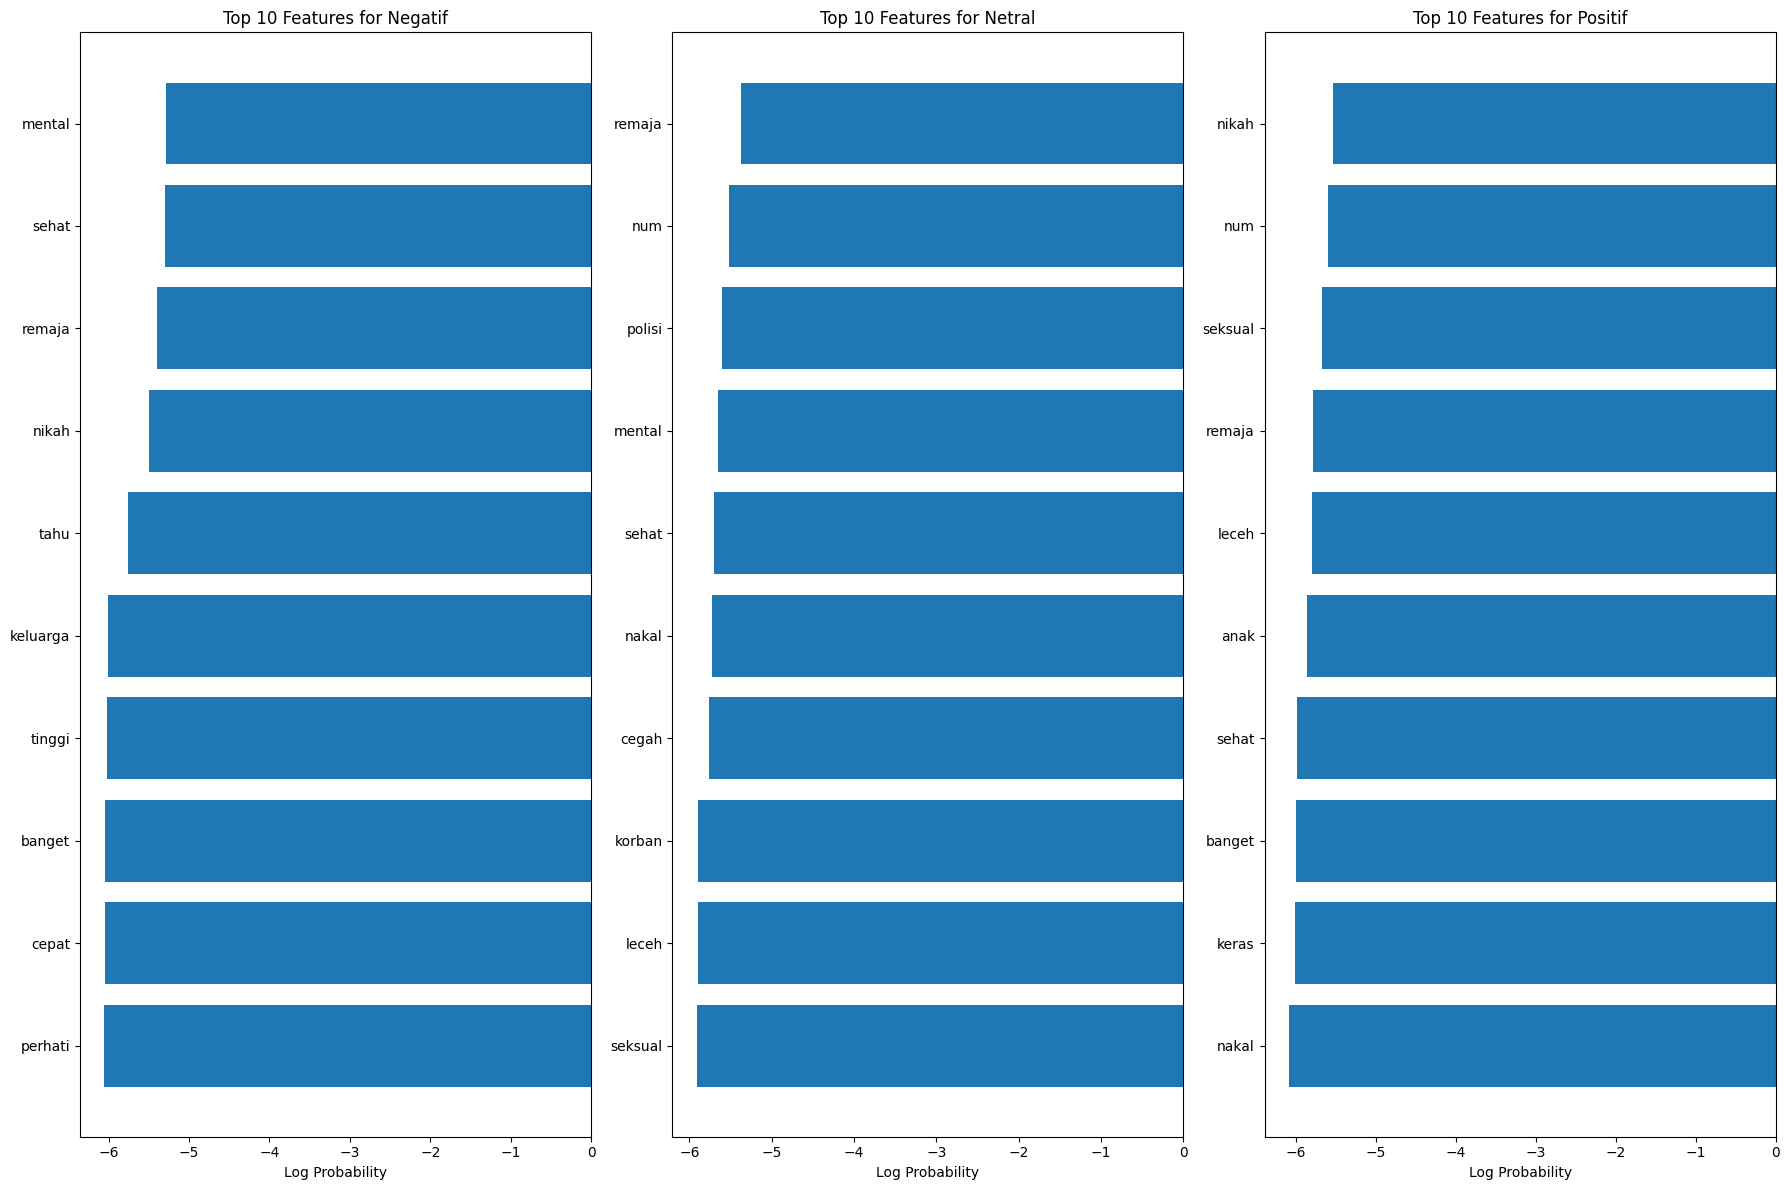

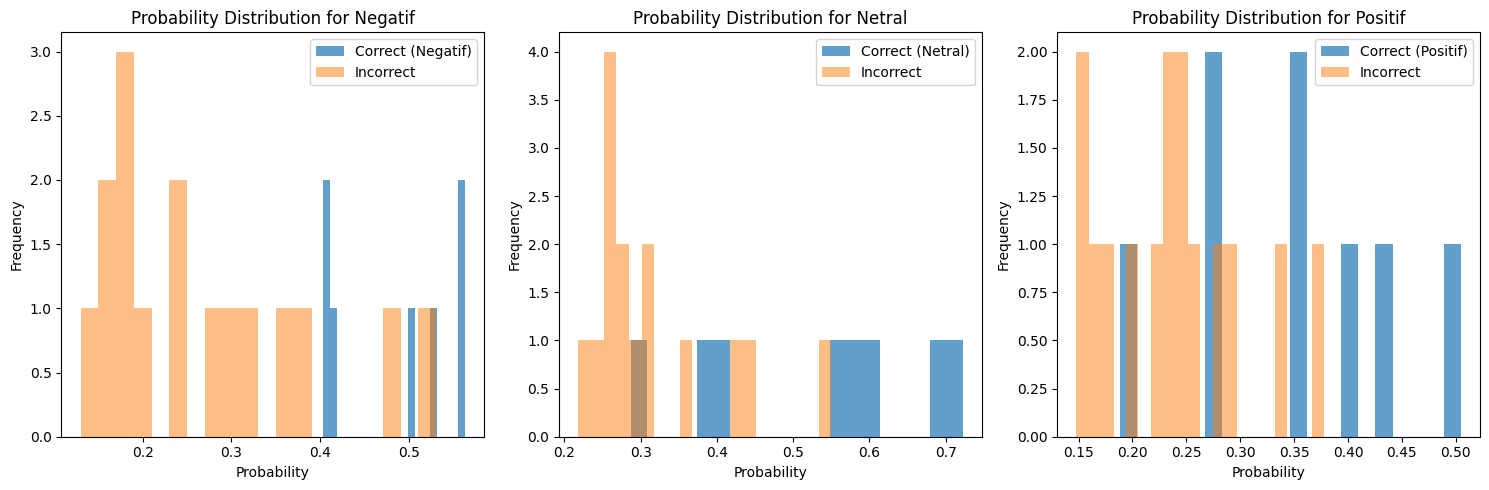

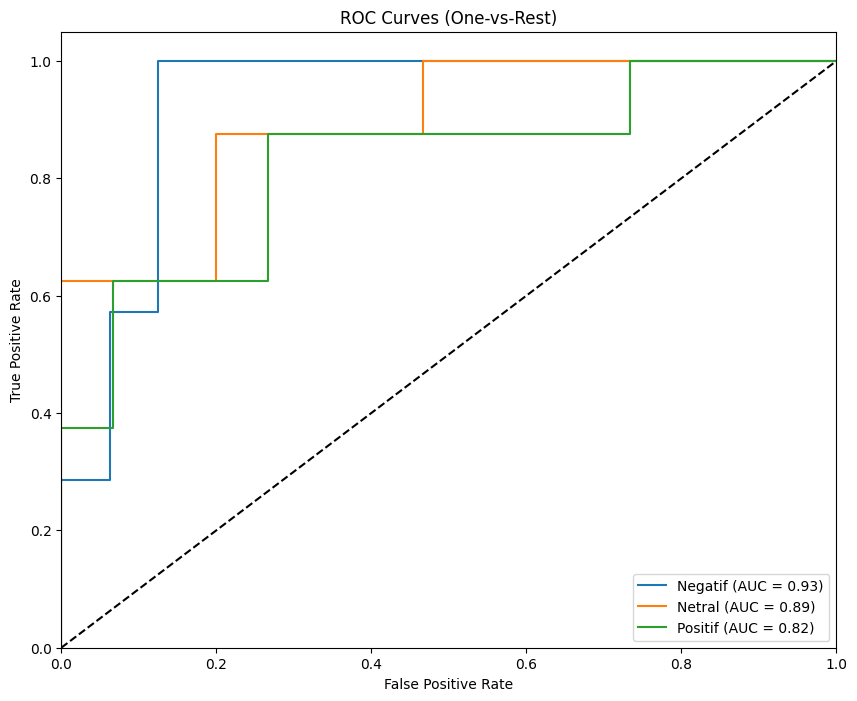

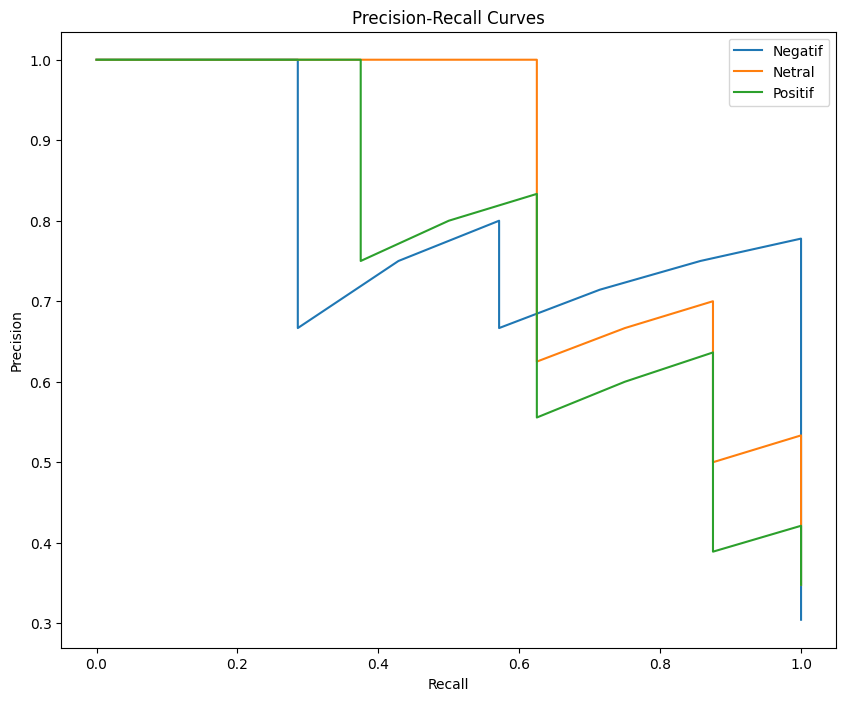

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler

# Load dataset
df = pd.read_csv('/content/labelled/tokenized_with_sentiment.csv')

# Convert sentiment labels to numeric
label_map = {"Negatif": 0, "Netral": 1, "Positif": 2}
df["sentiment_label"] = df["sentiment"].map(label_map)

# Remove NaN in text
df["text"] = df["text"].fillna("")

# Separate features (X) and labels (y)
X = df["text"]
y = df["sentiment_label"]

# Apply Resampling to Balance the Dataset
resampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = resampler.fit_resample(X.values.reshape(-1, 1), y)
X_resampled = X_resampled.flatten()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# Ensure no NaN after splitting
X_train = pd.Series(X_train).fillna("")
X_test = pd.Series(X_test).fillna("")

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naïve Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb.predict(X_test_tfidf)
probs = nb.predict_proba(X_test_tfidf)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_map.keys()))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes with Resampling")
plt.show()

# Class Distribution Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y, palette="viridis")
plt.title("Original Class Distribution")
plt.xlabel("Sentiment")
plt.xticks([0, 1, 2], ["Negatif", "Netral", "Positif"])
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Resampled Class Distribution")
plt.xlabel("Sentiment")
plt.xticks([0, 1, 2], ["Negatif", "Netral", "Positif"])
plt.tight_layout()
plt.show()

# Feature Importance Visualization
feature_names = vectorizer.get_feature_names_out()
class_labels = ["Negatif", "Netral", "Positif"]

def plot_top_features(clf, feature_names, class_labels, top_n=10):
    plt.figure(figsize=(18, 12))
    for i, class_label in enumerate(class_labels):
        feature_importance = clf.feature_log_prob_[i]
        sorted_idx = np.argsort(feature_importance)
        top_features_idx = sorted_idx[-top_n:]
        top_features = [feature_names[idx] for idx in top_features_idx]
        top_importance = [feature_importance[idx] for idx in top_features_idx]
        plt.subplot(1, 3, i+1)
        plt.barh(top_features, top_importance)
        plt.title(f"Top {top_n} Features for {class_label}")
        plt.xlabel("Log Probability")
    plt.tight_layout()
    plt.show()

plot_top_features(nb, feature_names, class_labels)

# Probability Distribution Visualization
plt.figure(figsize=(15, 5))
for i, label in enumerate(class_labels):
    plt.subplot(1, 3, i+1)
    class_indices = np.where(y_test == i)[0]
    if len(class_indices) > 0:
        correct_probs = probs[class_indices, i]
        plt.hist(correct_probs, bins=20, alpha=0.7, label=f"Correct ({label})")
        other_probs = []
        for j in range(3):
            if j != i:
                other_indices = np.where(y_test == j)[0]
                if len(other_indices) > 0:
                    other_probs.extend(probs[other_indices, i])
        if other_probs:
            plt.hist(other_probs, bins=20, alpha=0.5, label="Incorrect")
    plt.title(f"Probability Distribution for {label}")
    plt.xlabel("Probability")
    plt.ylabel("Frequency")
    plt.legend()
plt.tight_layout()
plt.show()

# ROC Curve (One-vs-Rest)
plt.figure(figsize=(10, 8))
for i, label in enumerate(class_labels):
    y_bin = np.array([1 if y == i else 0 for y in y_test])
    y_score = probs[:, i]
    fpr, tpr, _ = roc_curve(y_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i, label in enumerate(class_labels):
    y_bin = np.array([1 if y == i else 0 for y in y_test])
    y_score = probs[:, i]
    precision, recall, _ = precision_recall_curve(y_bin, y_score)
    plt.plot(recall, precision, label=f'{label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="best")
plt.show()


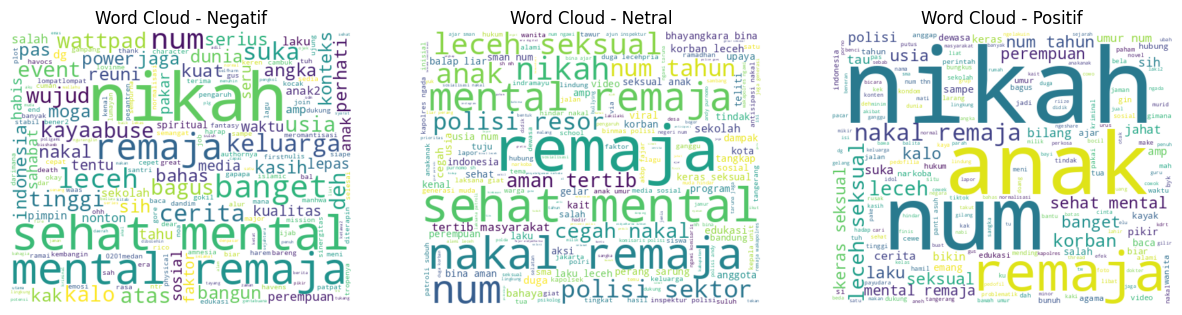

In [15]:
from wordcloud import WordCloud

# Gabungkan teks berdasarkan kategori sentimen
text_negatif = " ".join(df[df["sentiment_label"] == 0]["text"])
text_netral = " ".join(df[df["sentiment_label"] == 1]["text"])
text_positif = " ".join(df[df["sentiment_label"] == 2]["text"])

# Buat Word Cloud untuk setiap sentimen
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

wordcloud_neg = WordCloud(width=500, height=400, background_color="white").generate(text_negatif)
wordcloud_net = WordCloud(width=500, height=400, background_color="white").generate(text_netral)
wordcloud_pos = WordCloud(width=500, height=400, background_color="white").generate(text_positif)

ax[0].imshow(wordcloud_neg, interpolation="bilinear")
ax[0].set_title("Word Cloud - Negatif")
ax[0].axis("off")

ax[1].imshow(wordcloud_net, interpolation="bilinear")
ax[1].set_title("Word Cloud - Netral")
ax[1].axis("off")

ax[2].imshow(wordcloud_pos, interpolation="bilinear")
ax[2].set_title("Word Cloud - Positif")
ax[2].axis("off")

plt.show()
